# Keras를 활용한 심층 신경망 실습 - Fashion_MNIST

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Flatten 
from keras.layers import Dense
from tensorflow import keras
np.set_printoptions(suppress=True)

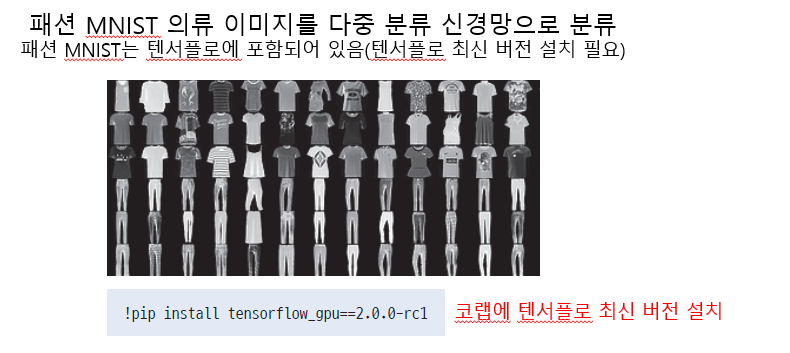

#### 데이터 탐색

In [12]:
X_train_np = np.loadtxt('./data/skyggle_Fashion_MNIST/X_train.txt')
y_train_np = np.loadtxt('./data/skyggle_Fashion_MNIST/y_train.txt').astype('int')
X_test_np = np.loadtxt('./data/skyggle_Fashion_MNIST/X_test.txt')

In [5]:
X_train_np.shape, y_train_np.shape, X_test_np.shape

((60000, 784), (60000,), (10000, 784))

In [7]:
import pandas as pd
pd.read_csv('./data/skyggle_Fashion_MNIST/submission.csv')

,no,label
0,1,NaN
1,2,NaN
2,3,NaN
3,4,NaN
4,5,NaN
...,...,...
9995,9996,NaN
9996,9997,NaN
9997,9998,NaN
9998,9999,NaN


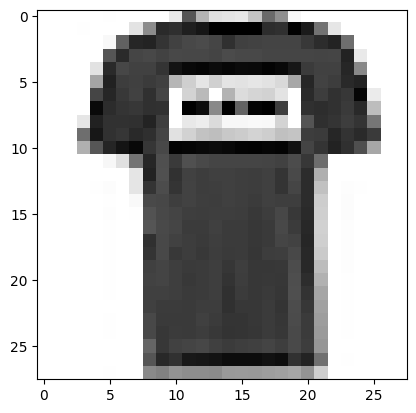

In [14]:
# 샘플 이미지 확인
# cmap의 기본값 'viridis' 짙은 녹색 ~ 밝은 노란색, cmap=gray, 0에 가까울수록 어둡다
plt.imshow(X_train_np[1].reshape(28, 28), cmap='Greys')

In [13]:
# 클래스(타겟)의 내용과 의미 확인하기
y_train_np[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])

In [15]:
class_names = [
                    "T-shirt/top",
                    "Trouser",
                    "Pullover",
                    "Dress",
                    "Coat",
                    "Sandal",
                    "Shirt",
                    "Sneaker",
                    "Bag",
                    "Ankle boot",
                ]
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [16]:
# 타겟 분포 확인하기 : numpy.bincount() - 배열에 있는 정수값의 빈도를 세고, 정수에 해당하는 인덱스 위치에 저장함

pd.Series(y_train_np).value_counts()

9    6000
0    6000
3    6000
2    6000
7    6000
5    6000
1    6000
6    6000
4    6000
8    6000
dtype: int64

#### 데이터 준비 : 분할, 정규화, 차원 변경

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train_np, y_train_np, stratify=y_train_np, test_size=0.2, random_state=42)

In [18]:
X_train.shape, X_val.shape

((48000, 784), (12000, 784))

In [19]:
y_train.shape, y_val.shape

((48000,), (12000,))

In [ ]:
# 데이터 정규화

X_train = X_train / 255
X_val = X_val / 255

y_train_encoded = to_categorical(y_train)

####  인공 신경망 모형 구성

#### 최적화 알고리즘과 손실함수 지정: 모형의 학습 과정 설정

#### 모델 구조 이미지 출력 및 파일 저장

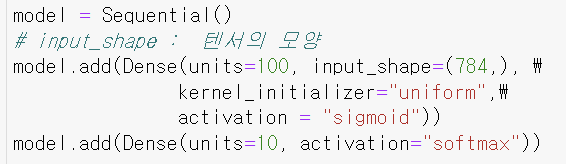

#### 모델 훈련

#### 손실과 정확도 그래프: 모델 성능 평가

In [ ]:
#######################################